In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('vgsales.csv', sep=",")

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.shape

(16598, 11)

In [6]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16598


In [9]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Year. Тип данных float64. Количество пустых значений 271, 1.63%.


In [10]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Year
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0
...,...
16593,2002.0
16594,2003.0
16595,2008.0
16596,2010.0


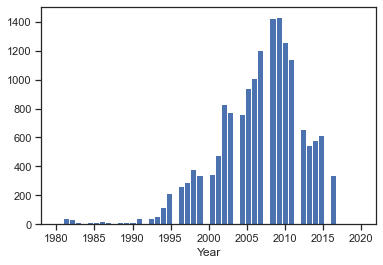

In [12]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [13]:
data_num_Year = data_num[['Year']]
data_num_Year.head()

,Year
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [15]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Year)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [16]:
strategies=['mean', 'median', 'most_frequent']

In [17]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Year)
    return data_num_imp[mask_missing_values_only]

In [18]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2

In [19]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 20

In [20]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 20

In [21]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [22]:
data[['Year']].describe()

,Year
count,16327.000000
mean,2006.406443
std,5.828981
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [23]:
for i in strategies:
    print(test_num_impute_col(data, 'Year', i))

('Year', 'mean', 271, 2006.4064433147546, 2006.4064433147546)
('Year', 'median', 271, 2007.0, 2007.0)
('Year', 'most_frequent', 271, 2009.0, 2009.0)


<b>Заполнение данных модой тк она лучше подходит</b>

In [24]:
data["Year"].fillna(2009.0, inplace = True)

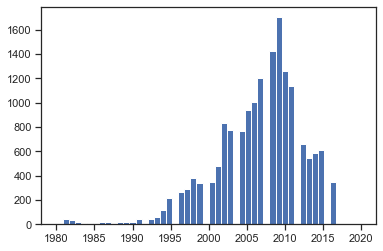

In [25]:
plt.hist(data["Year"], 50)
 
plt.show()

In [26]:
data["Year"].isnull().sum()

0

In [27]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Publisher. Тип данных object. Количество пустых значений 58, 0.35%.


In [28]:
cat_temp_data = data[['Publisher']]
cat_temp_data.head()

,Publisher
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo


In [29]:
cat_temp_data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [30]:
cat_temp_data[cat_temp_data['Publisher'].isnull()].shape

(58, 1)

In [31]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Nintendo'],
       ['Nintendo'],
       ['Nintendo'],
       ...,
       ['Activision'],
       ['7G//AMES'],
       ['Wanadoo']], dtype=object)

In [32]:
np.unique(data_imp2)

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
       'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
       'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
       'Activision', 'Activision Blizzard', 'Activision Value',
       'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
       'Aksys Games', 'Alawar Entertainment', 'Alchemist',
       'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
       'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
       'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
       'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
       'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
       'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
       'Athena', 'Atlus', 'Avalon Interactive

In [33]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Nintendo'],
       ['Nintendo'],
       ['Nintendo'],
       ...,
       ['Activision'],
       ['7G//AMES'],
       ['Wanadoo']], dtype=object)

In [34]:
np.unique(data_imp3)

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
       'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
       'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
       'Activision', 'Activision Blizzard', 'Activision Value',
       'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
       'Aksys Games', 'Alawar Entertainment', 'Alchemist',
       'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
       'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
       'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
       'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
       'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
       'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
       'Athena', 'Atlus', 'Avalon Interactive

In [35]:
data_imp3[data_imp3=='NA'].size

58

In [36]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo
...,...
16593,Kemco
16594,Infogrames
16595,Activision
16596,7G//AMES


In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [39]:
cat_enc['c1'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [40]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [41]:
le.inverse_transform([0, 1, 2, 3])

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy'], dtype=object)

In [42]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [43]:
cat_enc.shape

(16598, 1)

In [44]:
cat_enc_ohe.shape

(16598, 578)

In [45]:
cat_enc_ohe

<16598x578 sparse matrix of type '<class 'numpy.float64'>'
	with 16598 stored elements in Compressed Sparse Row format>

In [46]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
cat_enc.head(10)

,c1
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo
5,Nintendo
6,Nintendo
7,Nintendo
8,Nintendo
9,Nintendo


In [48]:
pd.get_dummies(cat_enc).head()

,c1_10TACLE Studios,c1_1C Company,c1_20th Century Fox Video Games,c1_2D Boy,c1_3DO,c1_49Games,c1_505 Games,c1_5pb,c1_7G//AMES,c1_989 Sports,...,c1_Zushi Games,c1_bitComposer Games,c1_dramatic create,c1_fonfun,c1_iWin,c1_id Software,c1_imageepoch Inc.,c1_inXile Entertainment,"c1_mixi, Inc",c1_responDESIGN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_20th Century Fox Video Games,Publisher_2D Boy,Publisher_3DO,Publisher_49Games,Publisher_505 Games,Publisher_5pb,Publisher_7G//AMES,Publisher_989 Sports,...,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN,Publisher_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data['Publisher'].unique().sum()

TypeError: can only concatenate str (not "float") to str

In [ ]:
pd=pd.get_dummies(data['Publisher'])

In [51]:
data = data.drop('Publisher',axis = 1)

In [52]:
data = data.join(pd)

TypeError: 'module' object is not iterable

In [53]:
data 

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,0.00,0.01,0.00,0.00,0.01


In [54]:
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177803,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.177803,1.000000,-0.091454,0.005208,-0.170139,0.040322,-0.075303
NA_Sales,-0.401362,-0.091454,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.005208,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.170139,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.040322,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.075303,0.941047,0.902836,0.611816,0.748331,1.000000


In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Year']])

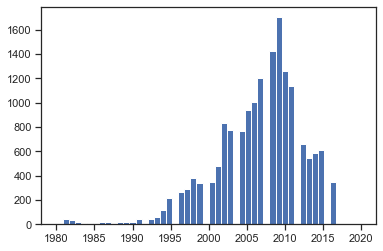

In [56]:
plt.hist(data['Year'], 50)
plt.show()

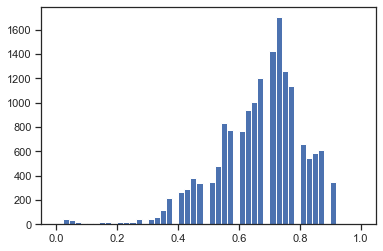

In [57]:
plt.hist(sc1_data, 50)
plt.show()

In [58]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Year']])

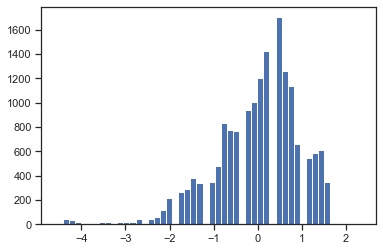

In [59]:
plt.hist(sc2_data, 50)
plt.show()

In [60]:
data.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [61]:
str_cols = []
for col in data.columns:
    
    dt = str(data[col].dtype)
    if (dt=='object'):
        print(data[col].unique().shape)
            

(11493,)
(31,)
(12,)


In [62]:
 data.drop("Name", axis=1, inplace=True  )

<b>Label encoding</b>

In [63]:
l = LabelEncoder()
lee= l.fit_transform(data['Genre'])

In [64]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [65]:
np.unique(lee)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [66]:
data['Genre']=lee

In [67]:
data['Genre']

0        10
1         4
2         6
3        10
4         7
         ..
16593     4
16594     8
16595     6
16596     5
16597     4
Name: Genre, Length: 16598, dtype: int32

In [68]:
data.head()

,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,10,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,4,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,6,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,10,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,7,11.27,8.89,10.22,1.00,31.37


In [69]:
platf = data[['Platform']]
platf.head()

,Platform
0,Wii
1,NES
2,Wii
3,Wii
4,GB


In [70]:
platf['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [71]:
platf[platf['Platform'].isnull()].shape

(0, 1)

In [72]:
ohe2 = OneHotEncoder()
cat_enc_ohe = ohe2.fit_transform(platf[['Platform']])

In [73]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],

In [74]:
lee2= l.fit_transform(data['Platform'])

In [75]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [76]:
np.unique(lee2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [77]:
data['Platform']=lee2

In [78]:
data.head()

,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,26,2006.0,10,41.49,29.02,3.77,8.46,82.74
1,2,11,1985.0,4,29.08,3.58,6.81,0.77,40.24
2,3,26,2008.0,6,15.85,12.88,3.79,3.31,35.82
3,4,26,2009.0,10,15.75,11.01,3.28,2.96,33.00
4,5,5,1996.0,7,11.27,8.89,10.22,1.00,31.37


<b>Вывод: в этой лр я научился 
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.</b>

<b>Пустые цифровые значения мы заменили модой . В категориальном признаке с пустыми значениями я заменил на часто встречаемые и применил one-hot encoding .К остальным категриальным :я удалил один признак тк там очень много уникальныъ значений соотвестввенно очень много признаков , два другие при помощи label encoding</b>

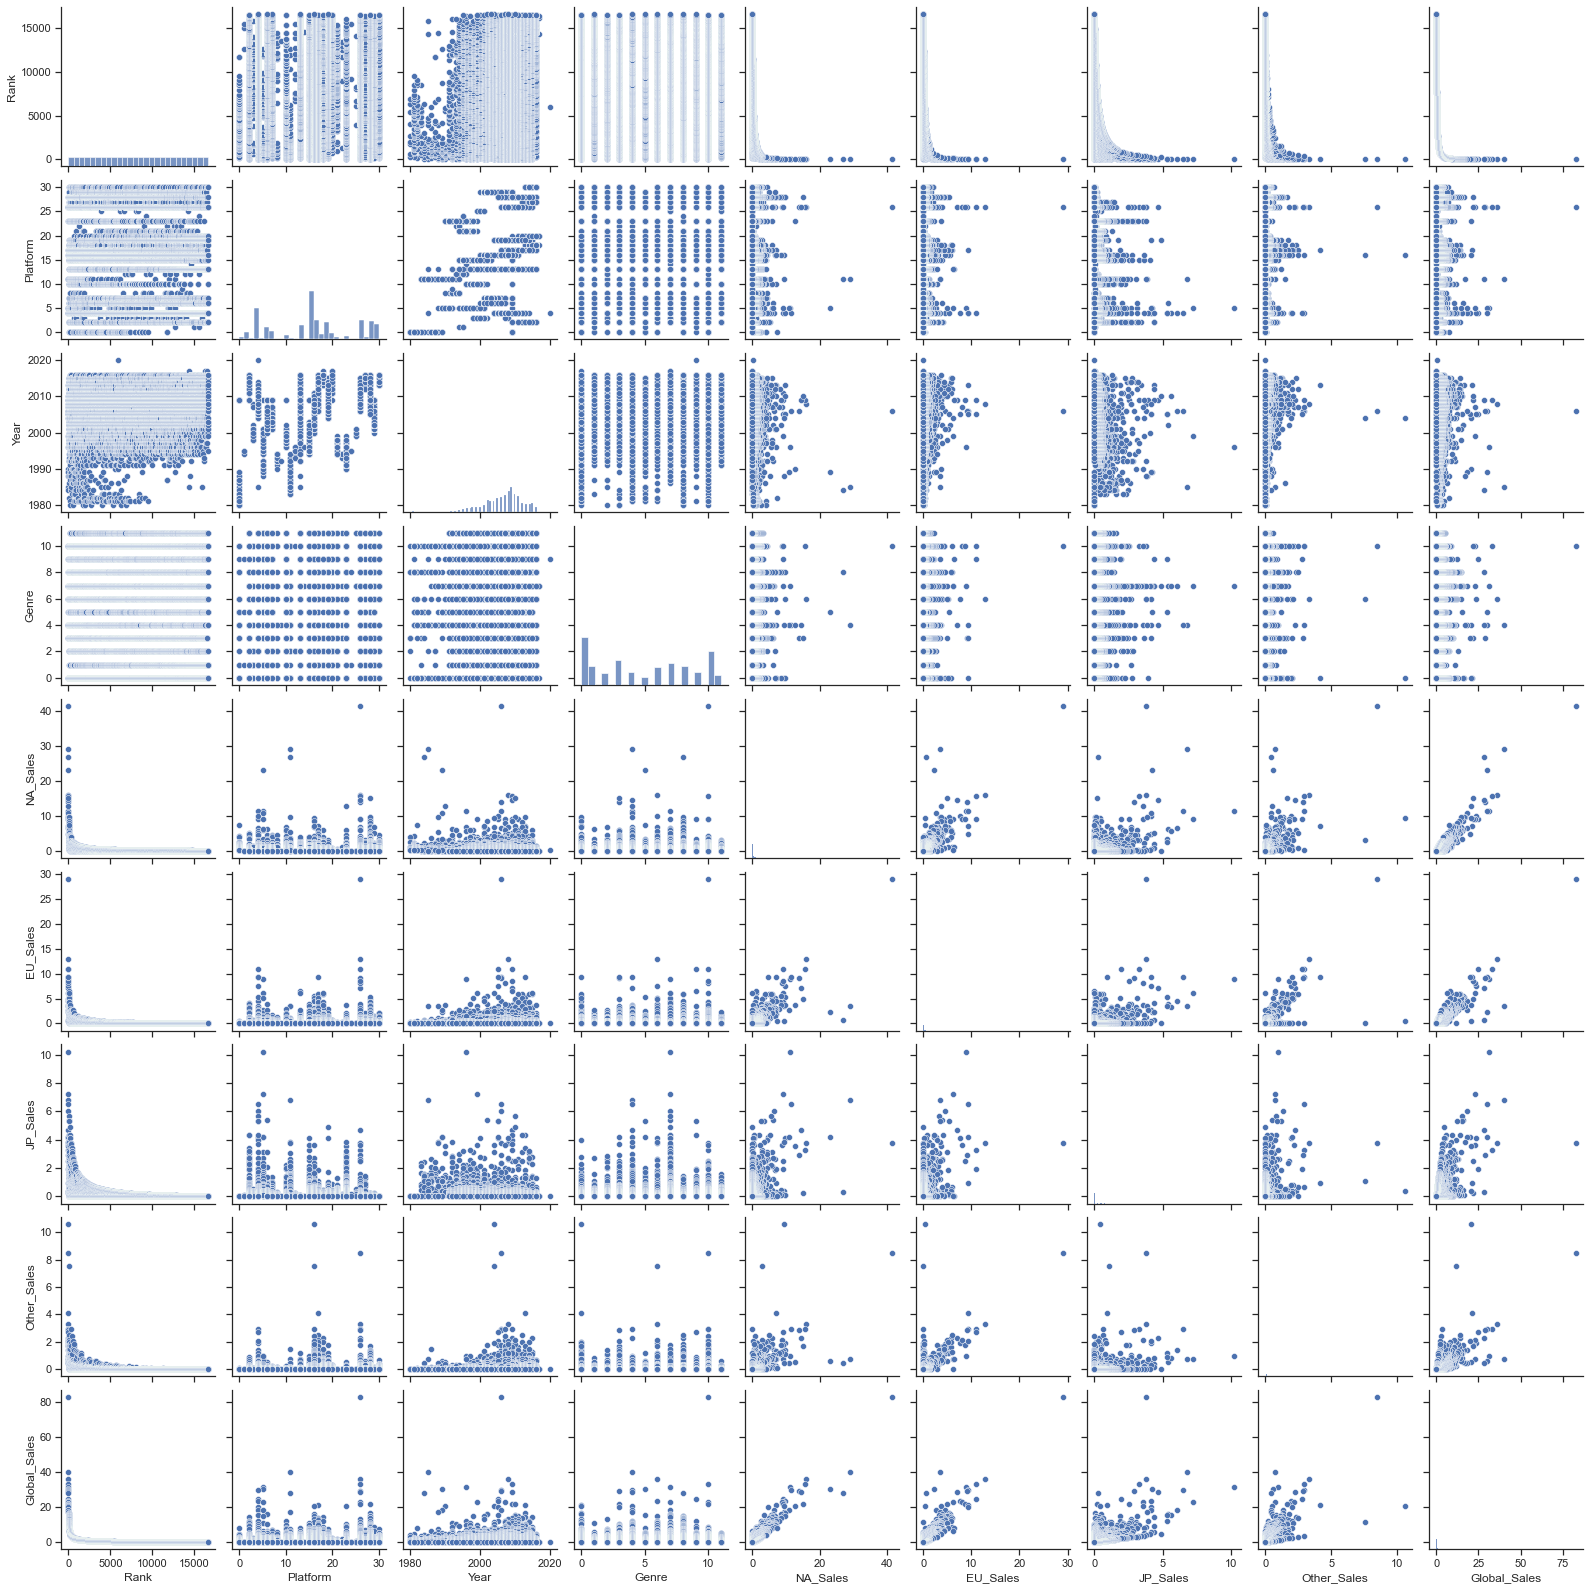

In [79]:
sns.pairplot(data)

<AxesSubplot:>

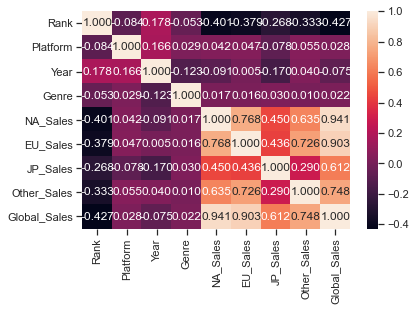

In [80]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')